In [2]:
import os 
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
import glob
import random

uint8
(480, 640, 3)
4405


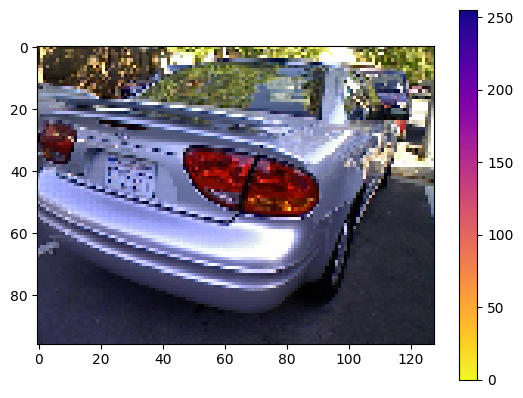

In [3]:
# show and resize an image and its corresp depth

im = Image.open(r"D:\RGBD_Dataset\00278\rgb\0000001-000000000000.jpg") 
depth = Image.open(r"D:\RGBD_Dataset\00278\depth\0000001-000000000000.png")

print(np.asarray(im).dtype)
print(np.asarray(im).shape)
print(np.max(np.asarray(depth)))

depth = depth.resize((128, 96), Image.NEAREST)
depth = np.asarray(depth)

im = im.resize((128, 96), Image.NEAREST)
im = np.asarray(im)

plt.imshow(np.flip(im, axis=1), cmap='plasma_r')
plt.colorbar()

In [4]:
# helper to select random columns for us 
def sel_random_cols(file_arr, num_select):
    
    cols = np.random.choice(file_arr.shape[1], num_select, replace=False)
    files = file_arr[:, cols]

    return files

In [5]:
# vstack proof of concept
images_rgb = glob.glob('D:/RGBD_Dataset/00278/rgb/*.jpg')
print(len(images_rgb))
images_rgb_slice = images_rgb[:5]

images_depth = glob.glob('D:/RGBD_Dataset/00278/depth/*.png')
print(len(images_depth))
images_depth_slice = images_depth[:5]

vstack = np.vstack((images_rgb_slice, images_depth_slice))

vstack[:, 1]

5381
5405


array(['D:/RGBD_Dataset/00278/rgb\\0000002-000000033516.jpg',
       'D:/RGBD_Dataset/00278/depth\\0000002-000000033369.png'],
      dtype='<U52')

In [6]:
sel_random_cols(vstack, 2)[:, 1]

array(['D:/RGBD_Dataset/00278/rgb\\0000001-000000000000.jpg',
       'D:/RGBD_Dataset/00278/depth\\0000001-000000000000.png'],
      dtype='<U52')

In [12]:
'''
Running this cell creates and saves the dataset. 
Any pre-existing dataset in this directory will be overwritten.
'''
NUM_FOLDERS = 42
FILES_PER_FOLDER = 130
EXAMPLES = int(NUM_FOLDERS * FILES_PER_FOLDER * 1.75)

folders = glob.glob('D:/RGBD_Dataset/*') # fetch y
folders = [item for item in folders if os.path.isdir(item)] # dirs only 

rgb_file_helper = 'rgb/*.jpg'
depth_file_helper = 'depth/*.png'

# format for glob
glob_friendly_rgb = [os.path.join(item, rgb_file_helper)  for item in folders]
glob_friendly_depth = [os.path.join(item, depth_file_helper)  for item in folders]

# pick the correct number of folders
glob_friendly_rgb = glob_friendly_rgb[:NUM_FOLDERS]
glob_friendly_depth = glob_friendly_depth[:NUM_FOLDERS]

# create empty d-set arrays 
X = np.empty((EXAMPLES, 96, 128, 3), dtype=np.uint8)
Y = np.empty((EXAMPLES, 96, 128), dtype=np.int32)
print(f"Initializing dataset for {EXAMPLES} examples...")

k = 0
# populate d-set
for i in range(len(glob_friendly_rgb)):
    rgb_files = glob.glob(glob_friendly_rgb[i])
    depth_files = glob.glob(glob_friendly_depth[i])

    # truncate 
    small = min(len(rgb_files), len(depth_files))
    rgb_files = rgb_files[:small-1]
    depth_files = depth_files[:small-1]

    vstack = np.vstack((rgb_files, depth_files))
    final_cols = sel_random_cols(vstack, FILES_PER_FOLDER)

    # open, resize, and populate 
    for j in range(final_cols.shape[1]):
        rgb_im = Image.open(final_cols[:, j][0])
        rgb_im = rgb_im.resize((128, 96), Image.NEAREST)
        rgb_im = np.asarray(rgb_im)
        
        depth_im = Image.open(final_cols[:, j][1])
        depth_im = depth_im.resize((128, 96), Image.NEAREST)
        depth_im = np.asarray(depth_im)

        X[k] = rgb_im
        Y[k] = depth_im
        k+=1

        if k % 100 == 0:
            print(f"Populating row #{k}, hang tight...")

# DATA AUGMENTATION
orig_k = k
remaining = EXAMPLES - (k-1) 
print(f'{remaining} examples remaining. Augmenting data...')

# randomly select and horizontally flip a selection of images 
for i in range (int(remaining * 2/3)):
    ix = np.random.randint(low=0, high=orig_k) # select randomly from the "normal" images

    X[k] = np.flip(X[ix], axis=1)
    Y[k] = np.flip(Y[ix], axis=1)
    k+=1
    
    if k % 100 == 0:
            print(f"Populating row #{k}, hang tight...")

remaining = EXAMPLES - (k-1)
print(f'{remaining} examples remaining. Augmenting data again...')

# randomly select and swap the R and G channels of a selection of images
for i in range(remaining -1):
    ix = np.random.randint(low=0, high=orig_k) # select randomly from the "normal" images

    X[k, :, :, 0], X[k, :, :, 1], X[k, :, :, 2] = X[ix, :, :, 1], X[ix, :, :, 0], X[ix, :, :, 2]
    Y[k] = Y[ix]
    k+=1

    if k % 100 == 0:
            print(f"Populating row #{k}, hang tight...")
    

print("Dataset populated. Saving...")
rgb_savepath = 'D:/RGBD_Dataset/X.npy'
depth_savepath = 'D:/RGBD_Dataset/Y.npy'
np.save(rgb_savepath, X)
np.save(depth_savepath, Y)
print(f"Dataset saved with {X.shape[0]} examples.")

Initializing dataset for 9555 examples...
Populating row #100, hang tight...
Populating row #200, hang tight...
Populating row #300, hang tight...
Populating row #400, hang tight...
Populating row #500, hang tight...
Populating row #600, hang tight...
Populating row #700, hang tight...
Populating row #800, hang tight...
Populating row #900, hang tight...
Populating row #1000, hang tight...
Populating row #1100, hang tight...
Populating row #1200, hang tight...
Populating row #1300, hang tight...
Populating row #1400, hang tight...
Populating row #1500, hang tight...
Populating row #1600, hang tight...
Populating row #1700, hang tight...
Populating row #1800, hang tight...
Populating row #1900, hang tight...
Populating row #2000, hang tight...
Populating row #2100, hang tight...
Populating row #2200, hang tight...
Populating row #2300, hang tight...
Populating row #2400, hang tight...
Populating row #2500, hang tight...
Populating row #2600, hang tight...
Populating row #2700, hang tigh